In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Read 99 post office CSV data (translated into English and extracted just columns of interest)
dfpo2 = pd.read_csv('2019-07_post-office-Hokkaido1e.csv',
    dtype={'po_code':str,'po_name':str,'longitude':np.float64,'latitude':np.float64})
dfpo2.head(15)

,po_code,po_name,longitude,latitude
0,0600906,Sapporo Chuo,141.35972,43.06700
1,0470031,Otaru,141.00484,43.19470
2,0510011,Muroran,140.97584,42.31625
3,0460004,Yoichi,140.80186,43.18976
4,0450013,Iwanai,140.51592,42.97640
5,0613361,Ishikari Kita,141.37573,43.24296
6,0520024,Date,140.86732,42.46821
7,0580204,Erimo,143.15268,42.01319
8,0530021,Tomakomai,141.60620,42.63660
9,0670001,Ebetsu,141.55686,43.11170


In [3]:
# Calculate the epicenter of 99 locations
epi_longitude,epi_latitude = dfpo2[['longitude','latitude']].mean().tolist()

In [4]:
# Display a Hokkaido map
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you don't have Forium module
import folium # map rendering library

#Display an initial map
map3 = folium.Map(location=[epi_latitude, epi_longitude], zoom_start=7)
map3

In [5]:
# Display 99 post office locations on the map
for lat, lon, po_name in zip(dfpo2['latitude'],dfpo2['longitude'],dfpo2['po_name']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=po_name,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map3)
map3

In [6]:
import operator

In [7]:
# create a data frame excluding those with "Sapporo" in post office name
dfpo4 = dfpo2[
    dfpo2['po_name'].apply(str.__contains__, str, ['Sapporo']).apply(operator.__not__)
]
dfpo4.head()

,po_code,po_name,longitude,latitude
1,0470031,Otaru,141.00484,43.19470
2,0510011,Muroran,140.97584,42.31625
3,0460004,Yoichi,140.80186,43.18976
4,0450013,Iwanai,140.51592,42.97640
5,0613361,Ishikari Kita,141.37573,43.24296


In [8]:
# then, excluding those with "Otaru"
dfpo5 = dfpo4[
    dfpo4['po_name'].apply(str.__contains__, str, ['Otaru']).apply(operator.__not__)
]
dfpo5.head()

,po_code,po_name,longitude,latitude
2,0510011,Muroran,140.97584,42.31625
3,0460004,Yoichi,140.80186,43.18976
4,0450013,Iwanai,140.51592,42.97640
5,0613361,Ishikari Kita,141.37573,43.24296
6,0520024,Date,140.86732,42.46821


In [9]:
# then, excluding those with "Yoichi"
dfpo6 = dfpo5[
    dfpo5['po_name'].apply(str.__contains__, str, ['Yoichi']).apply(operator.__not__)
]
dfpo6.head()

,po_code,po_name,longitude,latitude
2,0510011,Muroran,140.97584,42.31625
4,0450013,Iwanai,140.51592,42.97640
5,0613361,Ishikari Kita,141.37573,43.24296
6,0520024,Date,140.86732,42.46821
7,0580204,Erimo,143.15268,42.01319


In [10]:
# then, excluding those with "Muroran"
dfpo7 = dfpo6[
    dfpo6['po_name'].apply(str.__contains__, str, ['Muroran']).apply(operator.__not__)
]
dfpo7.head()

,po_code,po_name,longitude,latitude
4,0450013,Iwanai,140.51592,42.97640
5,0613361,Ishikari Kita,141.37573,43.24296
6,0520024,Date,140.86732,42.46821
7,0580204,Erimo,143.15268,42.01319
8,0530021,Tomakomai,141.60620,42.63660


In [11]:
# then, excluding those with "Tomakomai"
dfpo8 = dfpo7[
    dfpo7['po_name'].apply(str.__contains__, str, ['Tomakomai']).apply(operator.__not__)
]
dfpo8.head(15)

,po_code,po_name,longitude,latitude
4,0450013,Iwanai,140.51592,42.97640
5,0613361,Ishikari Kita,141.37573,43.24296
6,0520024,Date,140.86732,42.46821
7,0580204,Erimo,143.15268,42.01319
9,0670001,Ebetsu,141.55686,43.11170
10,0460104,Furubira,140.64357,43.27572
11,0613101,Hamamasu,141.38721,43.59872
12,0613601,Atsuta,141.43838,43.39667
14,0480351,Isoya,140.35384,42.85859
15,0450301,Kamoenai,140.43671,43.14025


In [12]:
# Let's see the number of post offices left.
dfpo8.shape[0]

78

In [13]:
import requests # library to handle requests

In [14]:
# Replace Foursquare ID and secret key with yours
# --- replaced them with dummy strings before uploading to GitHub
CLIENT_ID = 'YOUR CLIENT ID' # 
CLIENT_SECRET = 'YOUR CLIENT SECRET' # 
VERSION = '20180605' # Foursquare API version

In [15]:
# Trending places around 78 not-so-popular places
# It may take long if radius and LIMIT are large.
# Sometimes throws an KeyError exception:
#   because of malformed response
#   due to intermittent network errors or errors at the data source.
# Retrying usually works.

LIMIT = 100 # limit of number of venues returned by Foursquare API (max: 100)
radius = 1000 # define radius (max: 2000 = 2km)
# create URL trending venues
for index, row in dfpo8.iterrows():
    url = 'https://api.foursquare.com/v2/venues/trending?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, row['latitude'], row['longitude'], radius, LIMIT)
    results = requests.get(url).json()
    #List up trend venues
    for ix, trend_venues in enumerate(results['response']['venues']):
        print (row['po_name'], ":", trend_venues['name'], ":", trend_venues['categories'][0]['name'])

In [16]:
# Print out 4 east-end locations.
dfpo8.sort_values(['longitude'],ascending=False).head(4)

,po_code,po_name,longitude,latitude
63,0580422,Hidaka Meguro,143.31816,42.12575
44,0580421,Shoya,143.30318,42.04330
64,0580342,Erimo Misaki,143.24388,41.93406
7,0580204,Erimo,143.15268,42.01319


In [17]:
# Print out 2 west-end locations.
dfpo8.sort_values(['longitude']).head(2)

,po_code,po_name,longitude,latitude
17,0480621,Shimamaki,140.06578,42.69851
22,0480603,Honme,140.13673,42.74444


In [18]:
# Print out 2 north-end locations.
dfpo8.sort_values(['latitude'],ascending=False).head(2)

,po_code,po_name,longitude,latitude
95,0613103,Horo,141.35730,43.64744
11,0613101,Hamamasu,141.38721,43.59872


In [19]:
# Display 78 post office locations on the map
epi_longitude,epi_latitude = dfpo8[['longitude','latitude']].mean().tolist()
map4 = folium.Map(location=[epi_latitude, epi_longitude], zoom_start=7)
for lat, lon, po_name in zip(dfpo8['latitude'],dfpo8['longitude'],dfpo8['po_name']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=po_name,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map4)
map4

In [20]:
# Define a method to calculate the distance between 2 places, based on their latitudes and longitudes.
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
def dist_lat_long(latd1, lond1, latd2, lond2):
    # unit for latitude/longitude: degrees
    R = 6373.0
    # convert to radian
    latr1 = radians(latd1)
    lonr1 = radians(lond1)
    latr2 = radians(latd2)
    lonr2 = radians(lond2)
    dlonr = lonr2 - lonr1
    dlatr = latr2 - latr1

    a = sin(dlatr/2)**2 + cos(latr1) * cos(latr2) * sin(dlonr/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R*c

In [21]:
# Calculate the distance #1: 
dest1 = 'Hidaka Meguro'
origin1 = 'Erimo Misaki'
lond1, latd1 = dfpo8[dfpo8['po_name']==dest1][['longitude','latitude']].values[0].tolist()
# print (lond1, latd1) 
lond2, latd2 = dfpo8[dfpo8['po_name']==origin1][['longitude','latitude']].values[0].tolist()
print("Distance from {} to {}: {:.1f} km".format(
    origin1, dest1, dist_lat_long(latd1, lond1, latd2, lond2)))

Distance from Erimo Misaki to Hidaka Meguro: 22.2 km


In [22]:
places_to_visit = ['Horo','Hamamasu','Hidaka Meguro','Shoya','Erimo Misaki','Erimo','Shimamaki',
                  'Honme','Niwan','Biratori','Nakoma','Konbu']

In [23]:
# Calculate the distanace #2: Nakoma from Major post offices
dest = 'Nakoma'
dfNakoma = dfpo8[dfpo8['po_name']==dest][['latitude','longitude']]

In [24]:
dfNakoma.values[0].tolist()

[42.81392, 140.44986]

In [25]:
major_po = ['Sapporo Chuo', 'Otaru', 'Muroran', 'Tomakomai']
dfmpo = dfpo2[dfpo2['po_name'].isin(major_po)]

In [26]:
dfmpo[['latitude','longitude']].values

array([[ 43.067  , 141.35972],
       [ 43.1947 , 141.00484],
       [ 42.31625, 140.97584],
       [ 42.6366 , 141.6062 ]])

In [27]:
# Wrapper: array-based distance calculator
def dist_lat_long1(X1):
    # parameters as arrays
    # uses dfNakoma data frame defined outside
    latN, lonN = dfNakoma.values[0].tolist()
    return dist_lat_long(X1[0], X1[1], latN, lonN)

In [28]:
df_dist_mpo = dfmpo[['latitude','longitude']].apply(dist_lat_long1, axis=1, result_type='expand')
df_dist_mpo

0    79.254442
1    61.901326
2    70.149088
8    96.521633
dtype: float64

In [29]:
dfmpo2 = dfmpo.copy()
dfmpo2['dist']=df_dist_mpo
dfmpo2

,po_code,po_name,longitude,latitude,dist
0,0600906,Sapporo Chuo,141.35972,43.06700,79.254442
1,0470031,Otaru,141.00484,43.19470,61.901326
2,0510011,Muroran,140.97584,42.31625,70.149088
8,0530021,Tomakomai,141.60620,42.63660,96.521633


In [30]:
df_ptv = dfpo2[dfpo2['po_name'].isin(places_to_visit)]
df_ptv

,po_code,po_name,longitude,latitude
7,0580204,Erimo,143.15268,42.01319
11,0613101,Hamamasu,141.38721,43.59872
17,0480621,Shimamaki,140.06578,42.69851
22,0480603,Honme,140.13673,42.74444
44,0580421,Shoya,143.30318,42.04330
57,0481307,Nakoma,140.44986,42.81392
59,0481302,Konbu,140.60045,42.79485
63,0580422,Hidaka Meguro,143.31816,42.12575
64,0580342,Erimo Misaki,143.24388,41.93406
68,0550107,Biratori,142.13571,42.58281


In [31]:
df_nearby1 = pd.DataFrame(columns=['Post Office','Venue','Category'])

In [32]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius (max: 2000 = 2km)
for index, row in df_ptv.iterrows(): # places_to_visit
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, row['latitude'], row['longitude'], radius, LIMIT)
    results = requests.get(url).json()
    for ix1, item in enumerate(results['response']['groups'][0]['items']):
        df_nearby1 = df_nearby1.append(
            pd.Series(
                [row['po_name'],item['venue']['name'],item['venue']['categories'][0]['name']],
                index=['Post Office','Venue','Category']
            ), ignore_index=True
        )

In [33]:
# Print the number of nearby locations around 2km radius of places to visit in Hokkaido.
df_nearby1.shape[0]

43

In [34]:
df_nearby1

,Post Office,Venue,Category
0,Erimo,7-Eleven (セブンイレブン えりも本町店),Convenience Store
1,Erimo,セイコーマート えりも店,Convenience Store
2,Erimo,セイコーマート えりも大和店,Convenience Store
3,Erimo,いさみ寿司,Sushi Restaurant
4,Erimo,えりも駅,Bus Station
5,Erimo,えりも漁業協同組合 直売店,Fish Market
6,Hamamasu,Seicomart (セイコーマート 浜益店),Convenience Store
7,Hamamasu,レストラン海幸,Japanese Restaurant
8,Hamamasu,浜益漁港,Harbor / Marina
9,Hamamasu,浜益川下海浜公園,Beach


In [35]:
# Sort by the number of neighborhood venues
#    create a data frame: the number of venues for each post office
df_nearby3 = df_nearby1.groupby(['Post Office'])['Venue'].count().reset_index()
df_nearby3.sort_values(['Venue'],ascending=False)

,Post Office,Venue
2,Erimo Misaki,9
1,Erimo,6
3,Hamamasu,6
6,Konbu,5
9,Shoya,5
0,Biratori,4
5,Horo,3
4,Hidaka Meguro,2
8,Shimamaki,2
7,Nakoma,1


In [36]:
# Looking into Foursquare venue categories
import json

In [ ]:
# create URL venue categories
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
url # display URL

In [38]:
results = requests.get(url).json()

In [39]:
# Create a data frame for all the categories.
# Tried out the following code with increasing number of levels and found out there are five category levels.
# Only the final result is included here.
df_cat1 = pd.DataFrame(columns=['Level', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5'])

# Populate the data frame.
for ix1, js1 in enumerate(results['response']['categories']):
    df_cat1 = df_cat1.append(
        pd.Series([1,js1['name'],'','','',''],
                  index=df_cat1.columns),ignore_index=True)
    for ix2, js2 in enumerate(js1['categories']):
        df_cat1 = df_cat1.append(
            pd.Series([2,js1['name'],js2['name'],'','',''],
                      index=df_cat1.columns),ignore_index=True)
        for ix3, js3 in enumerate(js2['categories']):
            df_cat1 = df_cat1.append(
                pd.Series([3,js1['name'],js2['name'],js3['name'],'',''],
                      index=df_cat1.columns),ignore_index=True)
            for ix4, js4 in enumerate(js3['categories']):
                df_cat1 = df_cat1.append(
                    pd.Series([4,js1['name'],js2['name'],js3['name'],js4['name'],''],
                      index=df_cat1.columns),ignore_index=True)
                for ix5, js5 in enumerate(js4['categories']):
                    df_cat1 = df_cat1.append(
                        pd.Series([5,js1['name'],js2['name'],js3['name'],js4['name'],js5['name']],
                          index=df_cat1.columns),ignore_index=True)

In [40]:
#Print level 5 category names
df_cat1[df_cat1['Level']==5]

,Level,Cat1,Cat2,Cat3,Cat4,Cat5
372,5,Food,Latin American Restaurant,South American Restaurant,Brazilian Restaurant,Acai House
373,5,Food,Latin American Restaurant,South American Restaurant,Brazilian Restaurant,Baiano Restaurant
374,5,Food,Latin American Restaurant,South American Restaurant,Brazilian Restaurant,Central Brazilian Restaurant
375,5,Food,Latin American Restaurant,South American Restaurant,Brazilian Restaurant,Churrascaria
376,5,Food,Latin American Restaurant,South American Restaurant,Brazilian Restaurant,Empada House
377,5,Food,Latin American Restaurant,South American Restaurant,Brazilian Restaurant,Goiano Restaurant
378,5,Food,Latin American Restaurant,South American Restaurant,Brazilian Restaurant,Mineiro Restaurant
379,5,Food,Latin American Restaurant,South American Restaurant,Brazilian Restaurant,Northeastern Brazilian Restaurant
380,5,Food,Latin American Restaurant,South American Restaurant,Brazilian Restaurant,Northern Brazilian Restaurant
381,5,Food,Latin American Restaurant,South American Restaurant,Brazilian Restaurant,Pastelaria


In [41]:
# Wrapper: array-based distance calculator to be used in the DBSCAN metrics calculation
def dist_lat_long2(X1, X2):
    # parameters as arrays
    return dist_lat_long(X1[0], X1[1], X2[0], X2[1])

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
X = dfpo8[['latitude','longitude']].values
X[0:5]

array([[ 42.9764 , 140.51592],
       [ 43.24296, 141.37573],
       [ 42.46821, 140.86732],
       [ 42.01319, 143.15268],
       [ 43.1117 , 141.55686]])

In [44]:
# Tried a couple of epsilons = distance (km) between two places. 15km gives us a good clustering result.
# 10km, 12km, 20km are also OK.
epsilon = 15.0 # a specified radius that if includes enough number of points within, we call it dense area  
minimumSamples = 2 # determine the minimum number of data points we want in a neighborhood to define a cluster.
db = DBSCAN(eps=epsilon, min_samples=minimumSamples,metric=dist_lat_long2).fit(X)
labels = db.labels_
labels

array([ 0,  1,  2,  3,  1,  4,  5, -1,  0,  0,  6,  0,  0,  1,  4,  0,  0,
        7,  0,  1,  1,  8,  2,  1,  1,  9,  1,  1,  1,  2,  2,  1,  1, -1,
        4,  9,  6,  7,  3,  9,  1,  1,  1,  2,  1,  1,  0,  2,  1,  0,  0,
        0,  0,  1,  2,  3,  3,  1,  2,  9,  8,  0,  1,  2,  4,  0,  1,  0,
        6,  8,  1,  1,  2,  8,  5,  2,  2,  1])

In [45]:
dfpo9 = dfpo8.copy()
dfpo9.loc[:,'label'] = labels

In [46]:
labels.max()

9

In [47]:
dfpo9.head()

,po_code,po_name,longitude,latitude,label
4,0450013,Iwanai,140.51592,42.97640,0
5,0613361,Ishikari Kita,141.37573,43.24296,1
6,0520024,Date,140.86732,42.46821,2
7,0580204,Erimo,143.15268,42.01319,3
9,0670001,Ebetsu,141.55686,43.11170,1


In [48]:
colors = ['black', 'gray', 'darkblue', 'blue', 'darkpurple', 
    'purple', 'darkgreen', 'green', 'orange', 'darkred', 'red',
    'pink', 'lightgray', 'lightred', 'beige', 'cadetblue', 'white', 'lightblue', 'lightgreen', 'blue']

In [49]:
# Display 78 post office locations on the map
epi_longitude,epi_latitude = dfpo8[['longitude','latitude']].mean().tolist()
map5 = folium.Map(location=[epi_latitude, epi_longitude], zoom_start=7)
for lat, lon, po_name, lbl in zip(dfpo9['latitude'],dfpo9['longitude'],dfpo9['po_name'],dfpo9['label']):
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=po_name,
        color=colors[lbl+1],
        fill=True,
        fillcolor=colors[lbl+1],
        fill_opacity=0.7).add_to(map5)
map5

In [50]:
for epsil in range(3,27,3):
    db = DBSCAN(eps=epsil, min_samples=2, metric=dist_lat_long2).fit(X)
    labels = db.labels_
    print ('Epsilon={:3d}, Number of clusters={:3d}, Number of outliers={:3d}'.format(
        epsil, labels.max()+1, len(labels[labels==-1])))
    print (labels)

Epsilon=  3, Number of clusters=  2, Number of outliers= 73
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1
 -1 -1 -1 -1 -1 -1]
Epsilon=  6, Number of clusters= 10, Number of outliers= 54
[-1 -1 -1 -1  0  1  2 -1 -1  3 -1 -1 -1  4 -1  3 -1 -1 -1 -1  5 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  6  6 -1  1  7 -1 -1 -1  7  4 -1 -1 -1  4  5 -1 -1
 -1  8 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1  3  0 -1 -1 -1 -1 -1 -1 -1  4  5
 -1 -1  2  9  9 -1]
Epsilon=  9, Number of clusters= 16, Number of outliers= 34
[-1 -1 -1 -1  0  1  2 -1 -1  3  4  5  6  0  7  3  5 -1  6 -1  8 -1 -1  8
  9 -1 -1 -1  9 10 -1 11 11 -1  1 12 -1 -1 -1 12  0 13 -1 -1  0  8 -1 -1
 11 14 -1 14 15 -1 -1 -1 -1  9 10 -1 -1  3  0 10  7 -1 13 15  4 -1  0  8
 -1 -1  2 10 10 -1]
Epsilon= 12, Number of clusters= 14, Number of outliers=  8
[ 0  1  2  3  1  4  5 -1  6  0  7  6  6  1 

In [51]:
dfDBSCAN = pd.DataFrame(columns=['Epsilon','NumCluster','NumOutlier'],dtype=np.int8)
for epsil in range(2,25):
    db = DBSCAN(eps=epsil, min_samples=2, metric=dist_lat_long2).fit(X)
    labels = db.labels_
    #print (epsil, labels.max()+1, len(labels[labels==-1]))
    dfDBSCAN = dfDBSCAN.append(pd.Series([epsil, labels.max()+1, len(labels[labels==-1])],
                               index=dfDBSCAN.columns),ignore_index=True)

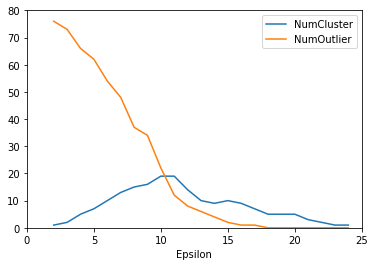

In [52]:
%matplotlib inline
dfDBSCAN.plot.line(x='Epsilon',xlim=[0,25],ylim=[0,80])